# Unemployment_analysis_with_python

# Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Accessing the dataset

In [2]:
df=pd.read_csv(r'C:\Users\tejith\Downloads\archive\Unemployment in India.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


# inspecting the dataset

In [4]:
df.sample(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
46,Chhattisgarh,30-11-2019,Monthly,2.77,6942931.0,43.56,Rural
604,Odisha,31-07-2019,Monthly,1.78,2542237.0,40.99,Urban
275,Sikkim,30-06-2020,Monthly,5.81,141313.0,42.36,Rural
30,Bihar,30-09-2019,Monthly,8.87,23905700.0,38.57,Rural
201,Maharashtra,31-05-2020,Monthly,16.89,18423447.0,41.21,Rural


In [5]:
df.isna().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [6]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [7]:
df['Area'].value_counts()

Urban    381
Rural    359
Name: Area, dtype: int64

In [8]:
df['Region'].value_counts()

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: Region, dtype: int64

In [9]:
df[' Date'].value_counts()

 31-10-2019    55
 30-11-2019    55
 31-05-2019    54
 30-06-2019    54
 31-07-2019    54
 31-08-2019    53
 31-12-2019    53
 31-01-2020    53
 29-02-2020    53
 30-09-2019    52
 31-03-2020    52
 30-04-2020    51
 31-05-2020    51
 30-06-2020    50
Name:  Date, dtype: int64

In [10]:
df[' Frequency'].value_counts()

Monthly     381
 Monthly    359
Name:  Frequency, dtype: int64

In [11]:
df[' Estimated Employed'].corr(df[' Estimated Unemployment Rate (%)'])

-0.2228763995221479

In [12]:
df2 = df.dropna().drop(columns=[' Frequency'])
df2

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...
749,West Bengal,29-02-2020,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,15.22,9240903.0,40.67,Urban


In [13]:
df2.reset_index(drop = True)

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...
735,West Bengal,29-02-2020,7.55,10871168.0,44.09,Urban
736,West Bengal,31-03-2020,6.67,10806105.0,43.34,Urban
737,West Bengal,30-04-2020,15.63,9299466.0,41.20,Urban
738,West Bengal,31-05-2020,15.22,9240903.0,40.67,Urban


In [14]:
df2.head()

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,5.17,12256762.0,44.68,Rural


In [15]:
df3 = df2.rename(columns={"Region" : "region", ' Date' : 'date', ' Estimated Unemployment Rate (%)' : 'est_unp', ' Estimated Employed' : 'est_emp',
                          ' Estimated Labour Participation Rate (%)' : 'est_labour', 'Area' : 'area'}).reset_index(drop = True)


In [16]:
df3.head()

,region,date,est_unp,est_emp,est_labour,area
0,Andhra Pradesh,31-05-2019,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,5.17,12256762.0,44.68,Rural


In [17]:
df3['est_emp'] = (df3['est_emp'] / 1000000).round(2)
df3

,region,date,est_unp,est_emp,est_labour,area
0,Andhra Pradesh,31-05-2019,3.65,12.00,43.24,Rural
1,Andhra Pradesh,30-06-2019,3.05,11.76,42.05,Rural
2,Andhra Pradesh,31-07-2019,3.75,12.09,43.50,Rural
3,Andhra Pradesh,31-08-2019,3.32,12.29,43.97,Rural
4,Andhra Pradesh,30-09-2019,5.17,12.26,44.68,Rural
...,...,...,...,...,...,...
735,West Bengal,29-02-2020,7.55,10.87,44.09,Urban
736,West Bengal,31-03-2020,6.67,10.81,43.34,Urban
737,West Bengal,30-04-2020,15.63,9.30,41.20,Urban
738,West Bengal,31-05-2020,15.22,9.24,40.67,Urban


# plotting the graph

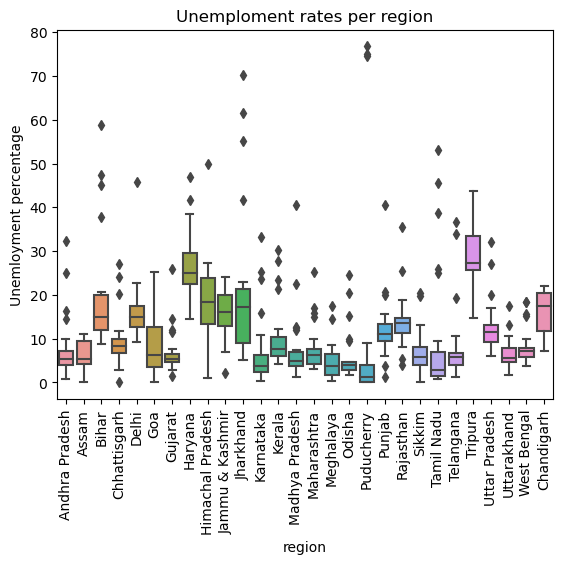

In [18]:
sns.boxplot(data= df3, x='region', y='est_unp')
plt.title('Unemploment rates per region')
plt.ylabel('Unemloyment percentage')
plt.xticks(rotation = 90)
plt.show()

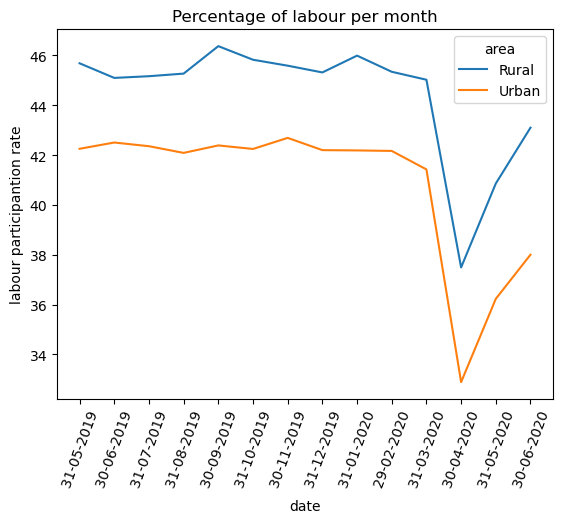

In [19]:
sns.lineplot(data=df3, x='date', y='est_labour', hue='area', errorbar= None)
plt.title('Percentage of labour per month')
plt.ylabel('labour participantion rate')
plt.xticks(rotation= 70)
plt.show()

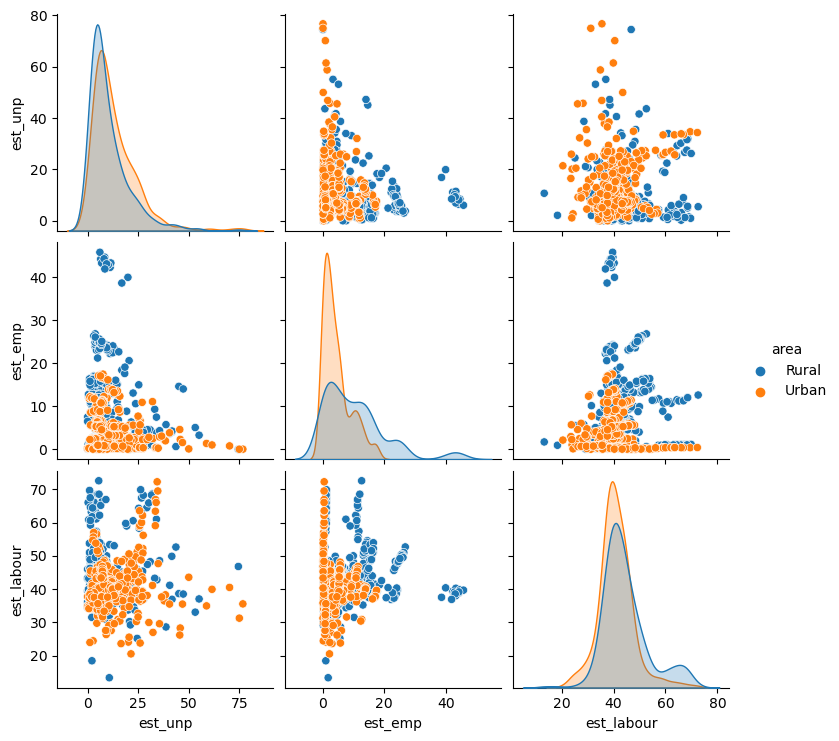

In [27]:
sns.pairplot(df3,diag_kind='kde',hue='area')
plt.xticks(rotation = 180)
plt.show()

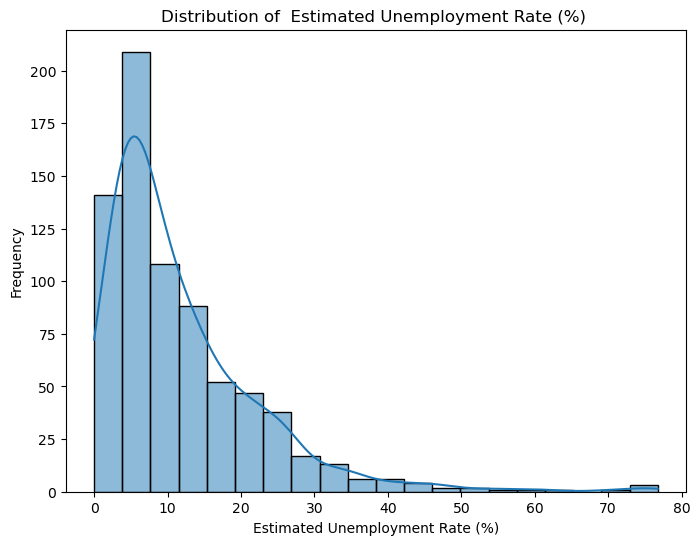

In [20]:
plt.figure(figsize=(8,6))
sns.histplot(df3['est_unp'], bins=20, kde=True)
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.title('Distribution of  Estimated Unemployment Rate (%) ')
plt.show()

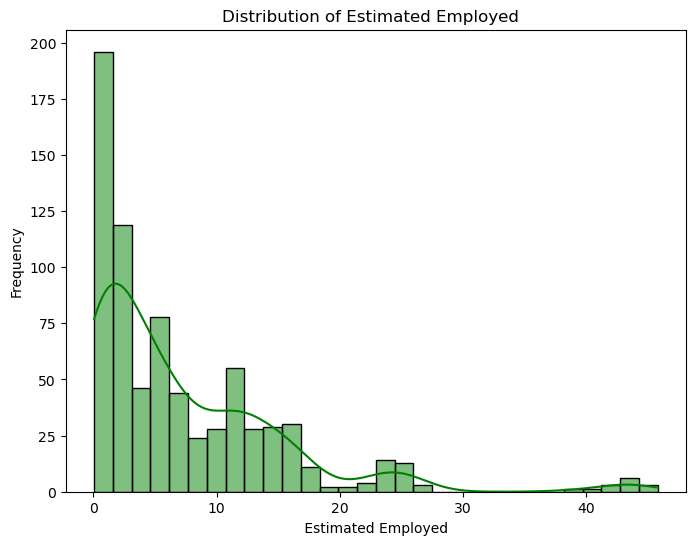

In [21]:
plt.figure(figsize=(8,6))
sns.histplot(df3['est_emp'],kde=True,bins=30,color='green')
plt.xlabel(' Estimated Employed ')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated Employed  ')
plt.show()

([<matplotlib.patches.Wedge at 0x245dee60dd0>,
 [Text(-0.051350606033972866, 1.0988007623131428, 'Urban'),
  Text(0.051350606033972734, -1.0988007623131428, 'Rural')],
 [Text(-0.02800942147307611, 0.5993458703526233, '51%'),
  Text(0.028009421473076033, -0.5993458703526233, '49%')])

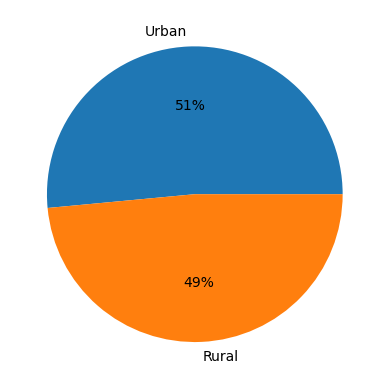

In [23]:
area = df3['area'].value_counts()
plt.pie(area,labels=area.keys(),autopct='%.0f%%')

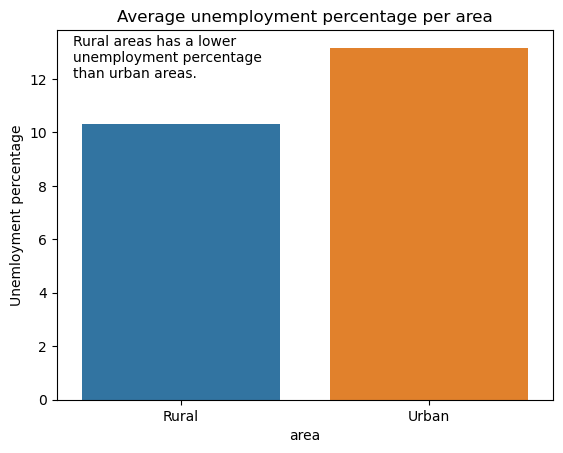

In [25]:
sns.barplot(df3, x='area', y= 'est_unp', errorbar=None)
plt.figtext(x= 0.15, y= 0.78 , s= 'Rural areas has a lower\nunemployment percentage\nthan urban areas.')
plt.title("Average unemployment percentage per area")
plt.ylabel('Unemloyment percentage')
plt.show()

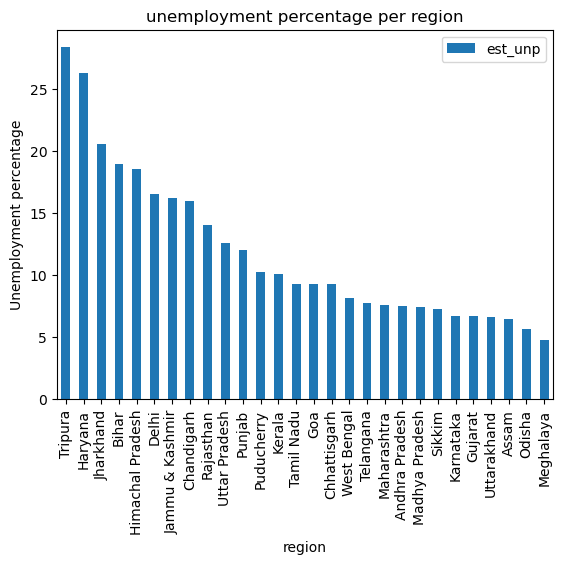

In [22]:
df4 = df3.groupby('region')[['est_unp']].mean().sort_values(by='est_unp',ascending= False)
df4.plot(kind='bar')
plt.title('unemployment percentage per region')
plt.ylabel('Unemployment percentage')
plt.xticks(rotation= 90)
plt.show()

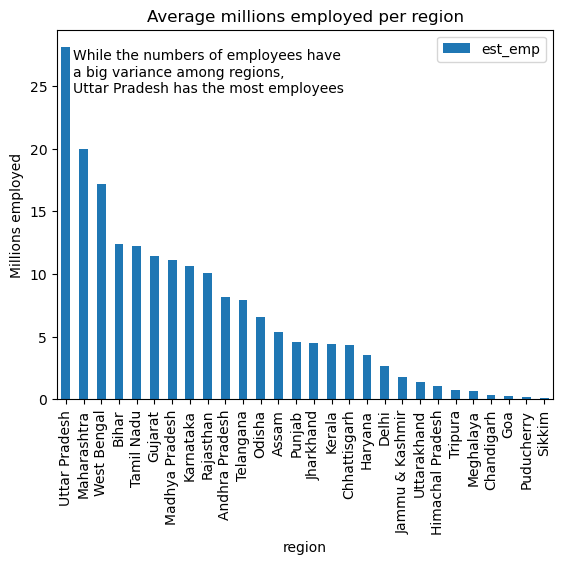

In [24]:
df5 = df3.groupby('region')[['est_emp']].mean().sort_values(by='est_emp',ascending= False)
df5.plot(kind='bar')
plt.title('Average millions employed per region')
plt.ylabel('Millions employed')
plt.figtext(x=0.15, y=0.75, s='While the numbers of employees have\na big variance among regions,\nUttar Pradesh has the most employees')
plt.show()

# plotting heatmap 

<Axes: >

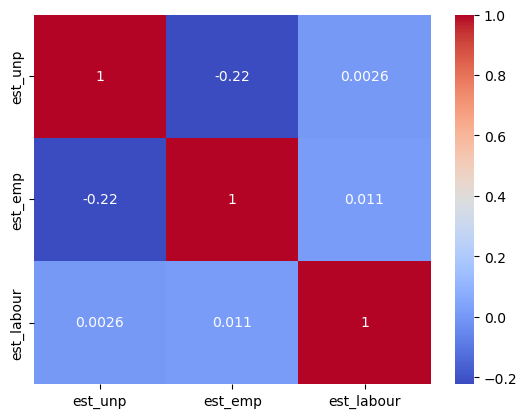

In [26]:
sns.heatmap(df3[['est_unp',"est_emp","est_labour"]].corr(),annot=True,cmap='coolwarm')

In [28]:
area_rural = df3[df3['area'] == 'Rural']
area_urban = df3[df3['area'] == 'Urban']
unemployment_r = area_rural['est_unp']
unemployment_u = area_urban['est_unp']

test = stats.ttest_ind(unemployment_r,unemployment_u)
print(test)

Ttest_indResult(statistic=-3.6332835697077326, pvalue=0.00029922677711475003)
